In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd/content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

 1919102141_Shankar_Subramaniyam_Assignment-1.ipynb
 1919102141_Shankar_Subramaniyam_Assignment-2.ipynb
 1919102141_Shankar_Subramaniyam_Assignment-3.ipynb
'CNN Practical Implementation.ipynb'
 Flowers-Dataset-Original.zip
'Python Basics B2.ipynb'
 Untitled0.ipynb


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

# **Unzip the Dataset**

In [ ]:
!unzip Flowers-Dataset-Original.zip

Archive:  Flowers-Dataset-Original.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg 

# **Image Augumentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True, vertical_flip=False)

In [ ]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Colab Notebooks/flowers",target_size=(64,64),class_mode='categorical',batch_size=75)

Found 4317 images belonging to 5 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Colab Notebooks/flowers",target_size=(64,64),class_mode='categorical',batch_size=75)

Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# **Create Model**

In [ ]:
from tensorflow.keras.models import Sequential

# **Add Layers**

In [ ]:
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32, (3,3), input_shape=(64,64,3),activation = 'relu')) #Feature map

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2))) #Pooled matrix

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
model.add(Dense(5,activation='softmax'))

# **Compile the Model**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
len(x_train)

58

In [ ]:
len(x_test)

58

# **Fit the Model**

In [ ]:
model.fit_generator(x_train, steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
58/58 [==============================] - 45s 771ms/step - loss: 1.4283 - accuracy: 0.4313 - val_loss: 1.2303 - val_accuracy: 0.4883
Epoch 2/10
58/58 [==============================] - 43s 751ms/step - loss: 1.0498 - accuracy: 0.5837 - val_loss: 1.0044 - val_accuracy: 0.6002
Epoch 3/10
58/58 [==============================] - 45s 786ms/step - loss: 0.9421 - accuracy: 0.6312 - val_loss: 0.8425 - val_accuracy: 0.6743
Epoch 4/10
58/58 [==============================] - 44s 765ms/step - loss: 0.8658 - accuracy: 0.6681 - val_loss: 0.8150 - val_accuracy: 0.6808
Epoch 5/10
58/58 [==============================] - 43s 750ms/step - loss: 0.8218 - accuracy: 0.6815 - val_loss: 0.7081 - val_accuracy: 0.7292
Epoch 6/10
58/58 [==============================] - 43s 739ms/step - loss: 0.7707 - accuracy: 0.7049 - val_loss: 0.9480 - val_accuracy: 0.6516
Epoch 7/10
58/58 [==============================] - 44s 759ms/step - loss: 0.7277 - accuracy: 0.7165 - val_loss: 0.7709 - val_accuracy: 0.7079

# **Save the Model**

In [ ]:
model.save('flowers.h5')

In [ ]:
ls

 1919102141_Shankar_Subramaniyam_Assignment-1.ipynb
 1919102141_Shankar_Subramaniyam_Assignment-2.ipynb
 1919102141_Shankar_Subramaniyam_Assignment-3.ipynb
'CNN Practical Implementation.ipynb'
 flowers/
 Flowers-Dataset-Original.zip
 flowers.h5
'Python Basics B2.ipynb'
 Untitled0.ipynb


# **Test the Model**

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('flowers.h5')

In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
img=image.load_img(r'/content/drive/MyDrive/Colab Notebooks/flowers/daisy/10466290366_cc72e33532.jpg')

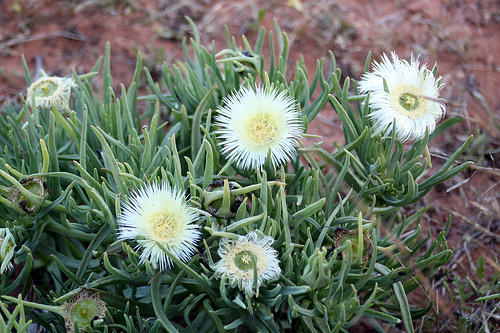

In [ ]:
img

In [ ]:
img=image.load_img(r'/content/drive/MyDrive/Colab Notebooks/flowers/daisy/10466290366_cc72e33532.jpg',target_size=(64,64))

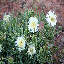

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[ 88.,  67.,  72.],
        [129.,  93.,  79.],
        [110.,  88.,  75.],
        ...,
        [106.,  82.,  95.],
        [120.,  86.,  85.],
        [101.,  75.,  84.]],

       [[107.,  61.,  61.],
        [132., 108.,  96.],
        [143., 137., 115.],
        ...,
        [ 91.,  71.,  80.],
        [126.,  83.,  90.],
        [115.,  80.,  86.]],

       [[ 92.,  71.,  76.],
        [ 93.,  65.,  54.],
        [104.,  92.,  78.],
        ...,
        [121.,  91.,  91.],
        [147., 125., 128.],
        [104.,  89.,  82.]],

       ...,

       [[ 87., 111.,  85.],
        [ 97., 134.,  90.],
        [ 52.,  70.,  44.],
        ...,
        [ 99.,  94., 117.],
        [ 63.,  65.,  52.],
        [ 85.,  50.,  83.]],

       [[117., 143., 106.],
        [ 82., 119.,  78.],
        [107., 147., 110.],
        ...,
        [  0.,   1.,   0.],
        [ 35.,  49.,  13.],
        [ 83.,  93.,  69.]],

       [[104., 133.,  87.],
        [  7.,  12.,  18.],
        [ 94., 1

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x= np.expand_dims(x,axis=0)

In [ ]:
x

array([[[[ 88.,  67.,  72.],
         [129.,  93.,  79.],
         [110.,  88.,  75.],
         ...,
         [106.,  82.,  95.],
         [120.,  86.,  85.],
         [101.,  75.,  84.]],

        [[107.,  61.,  61.],
         [132., 108.,  96.],
         [143., 137., 115.],
         ...,
         [ 91.,  71.,  80.],
         [126.,  83.,  90.],
         [115.,  80.,  86.]],

        [[ 92.,  71.,  76.],
         [ 93.,  65.,  54.],
         [104.,  92.,  78.],
         ...,
         [121.,  91.,  91.],
         [147., 125., 128.],
         [104.,  89.,  82.]],

        ...,

        [[ 87., 111.,  85.],
         [ 97., 134.,  90.],
         [ 52.,  70.,  44.],
         ...,
         [ 99.,  94., 117.],
         [ 63.,  65.,  52.],
         [ 85.,  50.,  83.]],

        [[117., 143., 106.],
         [ 82., 119.,  78.],
         [107., 147., 110.],
         ...,
         [  0.,   1.,   0.],
         [ 35.,  49.,  13.],
         [ 83.,  93.,  69.]],

        [[104., 133.,  87.],
       

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
y= np.argmax(model.predict(x),axis=1)

In [ ]:
y

array([0])

In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
index=['daisy','dandelion','rose','sunflower','tulip']


In [ ]:
index[y[0]]

'daisy'

In [ ]:
img=image.load_img(r'/content/drive/MyDrive/Colab Notebooks/flowers/tulip/113291410_1bdc718ed8_n.jpg',target_size=(64,64))

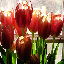

In [ ]:
img

In [ ]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)

In [ ]:
y

array([4])

In [ ]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
index[y[0]]

'tulip'